<a href="https://colab.research.google.com/github/iramjaved/OptusUBuildingAI/blob/main/BankTestFull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Identify or Formulate the problem**


The Bank wanted based on the historical customer marketing dataset want to setup a prediction model to identify who would take term deposit. 




#**2. Review AI ethics, algorithms and pretrained models**
Couldnt find any State of art algorithms or pretrained models available, however based on the problem statement XGBoost should be provide a good result and ROC AUC curve.



 

#**3. Data preparation**

Import libraries for data preparation and exploration.
For this exercise we have got data related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
Input variables:
** bank client data:**

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
 related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
** other attributes:**
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**social and economic context attributes**
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [107]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


import pandas_profiling
# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
# install shap explainability
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
#import data using pandas
df = pd.read_csv('/data/bank-additional-full.csv', sep=';')


#**4. Data Exploration**
1. check on the datatype of all the columns 
2. understand the column values based on the sample'
3. Check for null values
4. Understand the output variable to see if this is an imp=balanced problem
5. Explore the data formats to see any anomalies

In [109]:
# Check the data type  of the all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [110]:
# Check the sample data by returnign 20 top rows.
pd.set_option('display.max_columns', None)
df.head(20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [111]:

#check if any columns have null values
print("Total no. of columns in the dataframe")
print(len(df.columns))
print("Columns with any null values")
print(df.isnull().any())

Total no. of columns in the dataframe
21
Columns with any null values
age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


**Out of all the columns there are no columns with null values**

In [112]:
print(df.poutcome.unique())
print(df['poutcome'].value_counts(normalize=True))

['nonexistent' 'failure' 'success']
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64


**only 13% of the clients have been contacted earlier and their outputs recorded**

In [113]:
# Update output column to 0 and 1 to get the column in corrleation matrix

df['y'] = df['y'].map(lambda x: 1 if x == 'yes' else 0)

In [114]:


df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [115]:
# check the output variable to see if the problem is unbalanced problem

print(df.y.unique())
print(df['y'].value_counts(normalize=True))

[0 1]
0    0.887346
1    0.112654
Name: y, dtype: float64


**Since the output of the historical data shows 88% or the customers responded as 'no' this is an imbalanced problem**


In [116]:

print(df['nr.employed'].unique())
print(df['nr.employed'].value_counts(normalize=True))
print(df['emp.var.rate'].unique())
print(df['emp.var.rate'].value_counts(normalize=True))
print(df['cons.price.idx'].unique())
print(df['cons.price.idx'].value_counts(normalize=True))
print(df['cons.conf.idx'].unique())
print(df['cons.conf.idx'].value_counts(normalize=True))
print(df['euribor3m'].unique())
print(df['euribor3m'].value_counts(normalize=True))
print(df['pdays'].unique())
print(df['pdays'].value_counts(normalize=True))


[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
5228.1    0.394144
5099.1    0.207196
5191.0    0.188477
5195.8    0.089419
5076.2    0.040376
5017.5    0.026003
4991.6    0.018768
5008.7    0.015781
4963.6    0.015417
5023.5    0.004176
5176.3    0.000243
Name: nr.employed, dtype: float64
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
 1.4    0.394144
-1.8    0.222978
 1.1    0.188477
-0.1    0.089419
-2.9    0.040376
-3.4    0.026003
-1.7    0.018768
-1.1    0.015417
-3.0    0.004176
-0.2    0.000243
Name: emp.var.rate, dtype: float64
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
93.994    0.188477
93.918    0.162305
92.893    0.140672
93.444    0.125643
94.465    0.106196
93.200    0.087793
93.075    0.059678
92.201    0.018695
92.963    0.017359
92.431    0.010853
92.649    0.008668
94.215    0.007551
94.199

(array([13769.,  5318.,  7174.,  6178.,   718.,  4101.,   182.,   546.,
         2632.,   570.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

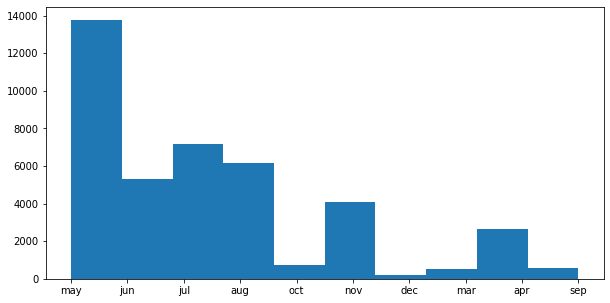

In [117]:
fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(df.month)


**Majority of the data is from May, Jul, Aug**

(array([ 1515.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39673.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

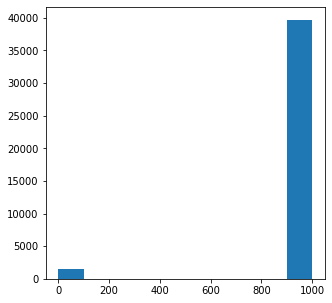

In [118]:
fig, axis = plt.subplots(figsize =(5, 5))
axis.hist(df.pdays)

**96% of the clients were not contacted previously.**

(array([  635.,  1423.,  1243.,     0.,  1663.,  8534.,     0.,     0.,
        11456., 16234.]),
 array([4963.6 , 4990.05, 5016.5 , 5042.95, 5069.4 , 5095.85, 5122.3 ,
        5148.75, 5175.2 , 5201.65, 5228.1 ]),
 <a list of 10 Patch objects>)

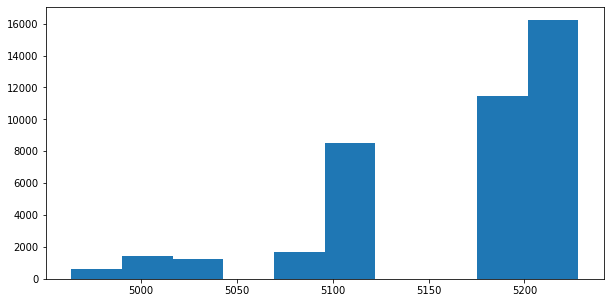

In [119]:
fig, axis = plt.subplots(figsize =(10, 5))

axis.hist(df['nr.employed'])



**The column nr.employed column seems to be incorrect as this as per the problem seems to be individual data. and the number of employees have data values in range of approx 5000. This needs to be further investigated.**

   


(array([35563.,     0.,     0.,     0.,     0.,  4252.,     0.,     0.,
            0.,  1373.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

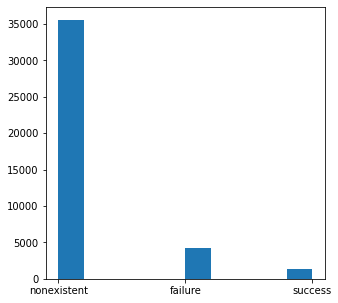

In [120]:
fig, axis = plt.subplots(figsize =(5, 5))

axis.hist(df['poutcome'])

**Looking at this, most of the clients were contacted for the first time**

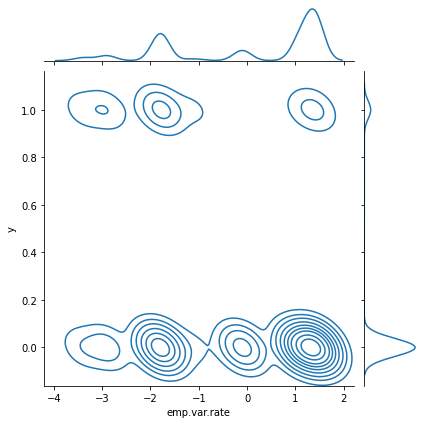

In [121]:
sns.jointplot(x=df['emp.var.rate'], y=df['y'], kind='kde')

**If we see only the clients who have subscribed to the term deposit, ie with y as 1, are with the lower the emp variation rate.**

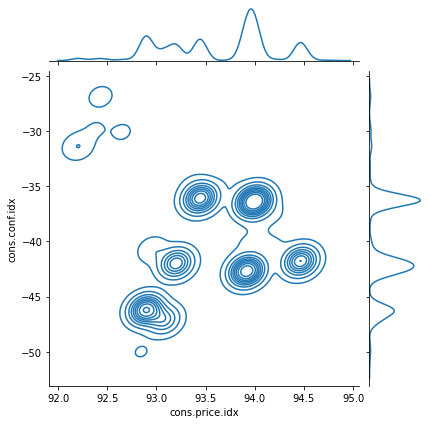

In [165]:
dfaccepted = df[(df['y']==0)]
sns.jointplot(x=dfaccepted['cons.price.idx'], y=dfaccepted["cons.conf.idx"], kind='kde')


**Altought the plot is multimodal however we can see the Client who subscribed for the term deposit are within the mid range of the cons.conf.idx and cons.price.idx**

<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, 'Correlation matrix')

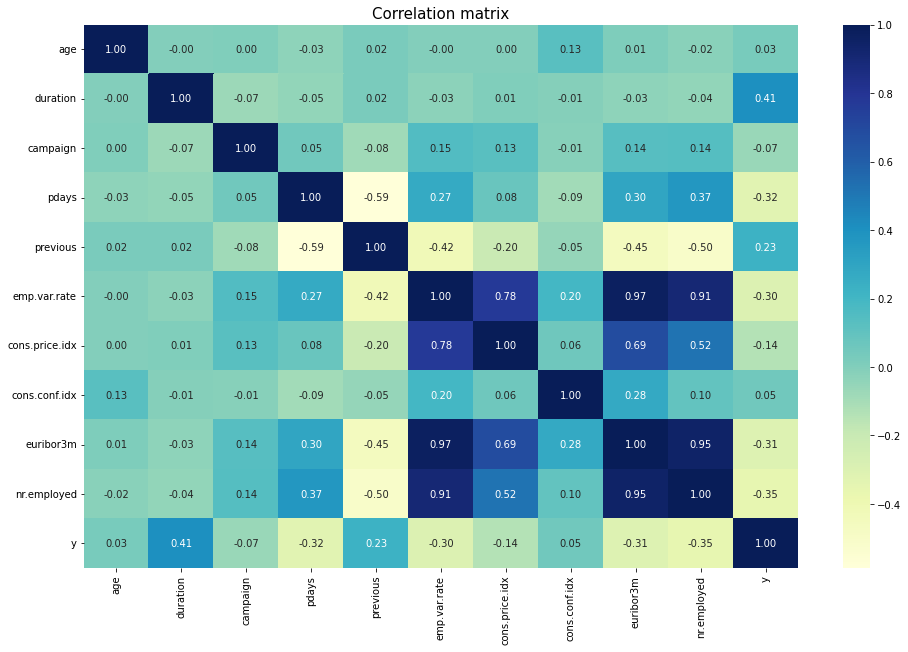

In [123]:
#Draw correlation matrix for the columns to check how individual columns correlate to each other
%matplotlib inline
corr_matrix = df.corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, cmap="YlGnBu", fmt=".2f", annot=True)
plt.title('Correlation matrix', fontsize = 15)
plt.show()

***Using the Correlation matrix we can see that 
y is meduim to high correlated to duration, pday, euribor3m and nremployed ***

In [124]:
corr_matrix['y'].sort_values(ascending=True)

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64

In [125]:
#sns.pairplot(data=df, hue='y')

#**5. External Data Aquisition**

We are using only the provided data and see how the model performs using the provided data. if required will look for external data. 

#**6. Data Augmentation**
To feed the data into the model it needs to be in Numeric/integer format. Since we have multiple string Categorical data fields; those needs to be translated into numbers. since most of the categorical field values not ordinal I am using One hot encoding here to avoid forming any relationship between the different values of the column. 


In [126]:
#Prepare data for one hot encoding
df['education'] = 'education_' + df['education'].astype(str)
print(df.head())

   age        job  marital              education  default housing loan  \
0   56  housemaid  married     education_basic.4y       no      no   no   
1   57   services  married  education_high.school  unknown      no   no   
2   37   services  married  education_high.school       no     yes   no   
3   40     admin.  married     education_basic.6y       no      no   no   
4   56   services  married  education_high.school       no      no  yes   

     contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon       261         1    999         0   
1  telephone   may         mon       149         1    999         0   
2  telephone   may         mon       226         1    999         0   
3  telephone   may         mon       151         1    999         0   
4  telephone   may         mon       307         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994    

In [127]:
#one hot encoding 
one_hot_education=pd.get_dummies(df['education'])
print(one_hot_education)

       education_basic.4y  education_basic.6y  education_basic.9y  \
0                       1                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   1                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
41183                   0                   0                   0   
41184                   0                   0                   0   
41185                   0                   0                   0   
41186                   0                   0                   0   
41187                   0                   0                   0   

       education_high.school  education_illiterate  \
0                          0                     0   
1                          1                     0   
2        

In [128]:
#Apply One hot encoding for rest of the string columns
df['marital'] = 'marital_' + df['marital'].astype(str)
df['job'] = 'job_' + df['job'].astype(str)
df['loan'] = 'loan_' + df['loan'].astype(str)
df['housing'] = 'housing_' + df['housing'].astype(str)
df['default'] = 'default_' + df['default'].astype(str)
df['contact'] = 'contact_' + df['contact'].astype(str)
df['day_of_week'] = 'day_of_week_' + df['day_of_week'].astype(str)
df['poutcome'] = 'poutcome_' + df['poutcome'].astype(str)

print(df.head())

   age            job          marital              education  \
0   56  job_housemaid  marital_married     education_basic.4y   
1   57   job_services  marital_married  education_high.school   
2   37   job_services  marital_married  education_high.school   
3   40     job_admin.  marital_married     education_basic.6y   
4   56   job_services  marital_married  education_high.school   

           default      housing      loan            contact month  \
0       default_no   housing_no   loan_no  contact_telephone   may   
1  default_unknown   housing_no   loan_no  contact_telephone   may   
2       default_no  housing_yes   loan_no  contact_telephone   may   
3       default_no   housing_no   loan_no  contact_telephone   may   
4       default_no   housing_no  loan_yes  contact_telephone   may   

       day_of_week  duration  campaign  pdays  previous              poutcome  \
0  day_of_week_mon       261         1    999         0  poutcome_nonexistent   
1  day_of_week_mon       1

In [129]:
one_hot_marital=pd.get_dummies(df['marital'])
one_hot_job=pd.get_dummies(df['job'])
one_hot_loan=pd.get_dummies(df['loan'])
one_hot_housing=pd.get_dummies(df['housing'])
one_hot_default=pd.get_dummies(df['default'])
one_hot_contact=pd.get_dummies(df['contact'])
one_hot_day_of_week=pd.get_dummies(df['day_of_week'])
one_hot_poutcome=pd.get_dummies(df['poutcome'])
print(one_hot_marital)

       marital_divorced  marital_married  marital_single  marital_unknown
0                     0                1               0                0
1                     0                1               0                0
2                     0                1               0                0
3                     0                1               0                0
4                     0                1               0                0
...                 ...              ...             ...              ...
41183                 0                1               0                0
41184                 0                1               0                0
41185                 0                1               0                0
41186                 0                1               0                0
41187                 0                1               0                0

[41188 rows x 4 columns]


In [130]:
df=df.join(one_hot_education)
df=df.join(one_hot_marital)
df=df.join(one_hot_job)
df=df.join(one_hot_loan)
df=df.join(one_hot_housing)
df=df.join(one_hot_default)
df=df.join(one_hot_contact)
df=df.join(one_hot_day_of_week)
df=df.join(one_hot_poutcome)

In [131]:
# check all the  columns before removing the base columns
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,job_housemaid,marital_married,education_basic.4y,default_no,housing_no,loan_no,contact_telephone,may,day_of_week_mon,261,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1,57,job_services,marital_married,education_high.school,default_unknown,housing_no,loan_no,contact_telephone,may,day_of_week_mon,149,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,37,job_services,marital_married,education_high.school,default_no,housing_yes,loan_no,contact_telephone,may,day_of_week_mon,226,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
3,40,job_admin.,marital_married,education_basic.6y,default_no,housing_no,loan_no,contact_telephone,may,day_of_week_mon,151,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,56,job_services,marital_married,education_high.school,default_no,housing_no,loan_yes,contact_telephone,may,day_of_week_mon,307,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [132]:
#Remove the encoded base columns
df = df.drop(columns=['marital','education','job','housing','loan','default','contact','month','poutcome','day_of_week'])
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [133]:
#Delete one column from each of the variable combination to remove data redundancy
df = df.drop(columns=['education_unknown','marital_single','job_unknown','housing_yes','loan_yes','default_yes','contact_cellular','poutcome_nonexistent'])
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_no,loan_unknown,housing_no,housing_unknown,default_no,default_unknown,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


#**8. Build Initial AI model**
Seperate the data for training testing and validation


In [134]:
# Randomly split the dataset into test/training/validation 
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print (train.shape, test.shape, validate.shape)


(24712, 46) (8238, 46) (8238, 46)


In [135]:
X_train = train.drop(columns=['y'])
y_train = train[['y']]

X_test = test.drop(columns=['y'])
y_test = test[['y']]

X_validate = validate.drop(columns=['y'])
y_validate = validate[['y']]

X_train.head()
y_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_no,loan_unknown,housing_no,housing_unknown,default_no,default_unknown,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
1568,31,732,2,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
24048,34,135,1,999,0,-0.1,93.798,-40.4,4.860,5195.8,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
17008,33,180,3,999,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
18846,48,164,1,999,0,1.4,93.444,-36.1,4.970,5228.1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
8218,58,150,1,999,0,1.4,94.465,-41.8,4.864,5228.1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


,y
1568,0
24048,1
17008,0
18846,0
8218,0


In [136]:
y_train.head()

,y
1568,0
24048,1
17008,0
18846,0
8218,0


In [137]:
#Logistic regression 
hrLogReg = LogisticRegression()
#fit the model on the training data
hrLogReg.fit(X_train, y_train)

LogisticRegression()

In [138]:

  y_predict = hrLogReg.predict(X_test)

  y_prob = hrLogReg.predict_proba(X_test)[:, 1]
  metrics.roc_auc_score(y_test, y_prob)

0.9245757975993917

**As our benchmark for our first model whis is Logistic regression we for a ROC AUC of `92% which is pretty decent, lets see if we use more complex models we get better results**

#**9. Build multiple models**
**Next I have tried multiple other models, more complex models to see if we can get better metric**


In [139]:
#Decision tree 
hrDecisionTree = tree.DecisionTreeClassifier()
hrDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
# K-nearest neighbour 
hrKNN = neighbors.KNeighborsClassifier()
hrKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [141]:
# XGBoost 
hrXGB = xgb.XGBClassifier()
hrXGB.fit(X_train,y_train)

XGBClassifier()

In [142]:
# Neural network - Multi-layer Perceptron
hrMLP = MLPClassifier()
hrMLP.fit(X_train,y_train)

MLPClassifier()

In [143]:
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 1]
y_prob
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 0]
y_prob

array([0., 1., 0., ..., 0., 0., 0.])

array([1., 0., 1., ..., 1., 1., 1.])

In [144]:
# DS: for clarity show without a loop
classifiers = [ hrMLP, hrXGB, hrKNN, hrDecisionTree, hrLogReg]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )

print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
|     MLPClassifier      |  0.911   |  0.477   |     0.928     |  0.554   |
|     XGBClassifier      |  0.917   |  0.581   |     0.948     |  0.639   |
|  KNeighborsClassifier  |  0.911   |  0.557   |     0.879     |  0.496   |
| DecisionTreeClassifier |   0.89   |  0.519   |     0.741     |  0.319   |
|   LogisticRegression   |  0.912   |  0.508   |     0.925     |  0.555   |
+------------------------+----------+----------+---------------+----------+


**Here we can see the XGBoost has given ROC AUC score of approx 95%**

#**11. Evaluate Primary Metrics**
Evaluate the model on Precision, recall, F1 Score.

In [145]:
#classification report
y_predict = hrLogReg.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7349
           1       0.64      0.42      0.51       889

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [146]:
y_predict = hrXGB.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7349
           1       0.64      0.53      0.58       889

    accuracy                           0.92      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [147]:
#confusion matrix 
confMat = metrics.confusion_matrix(y_test,y_predict)
print(confMat)



[[7084  265]
 [ 417  472]]


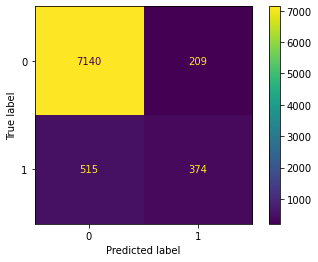

In [148]:
#a more visual confusion matrix for Logistic regression
metrics.plot_confusion_matrix(hrLogReg, X_test, y_test, values_format='.0f')

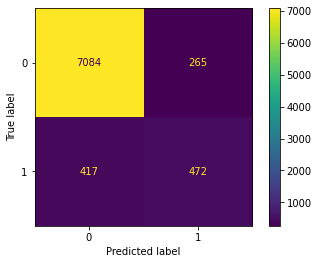

In [149]:
#a more visual confusion matrix XG Boost
metrics.plot_confusion_matrix(hrXGB, X_test, y_test, values_format='.0f')

Comparing ROC curve of Logistic regression and XGB

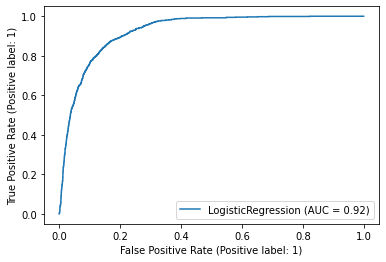

In [150]:
# A single ROC curve
metrics.plot_roc_curve(hrLogReg, X_test, y_test)

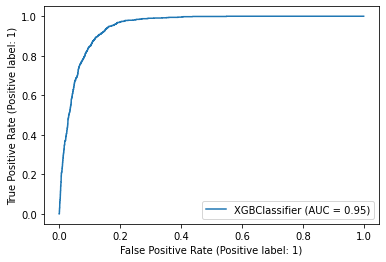

In [151]:
# A single ROC curve
metrics.plot_roc_curve(hrXGB, X_test, y_test)

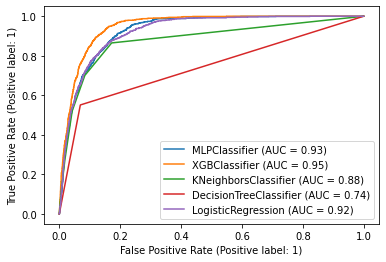

In [152]:
# All ROC curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)

#**12. AI Model Explainability**
Focus for model explainability is driven by ethical and regulatiry need to make AI transparent.

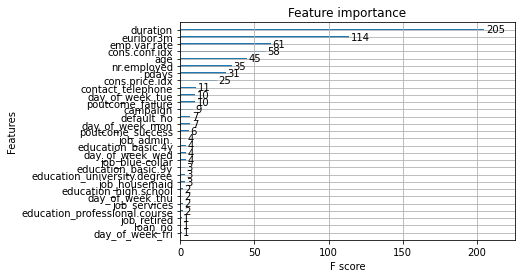

In [153]:
# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(hrXGB)

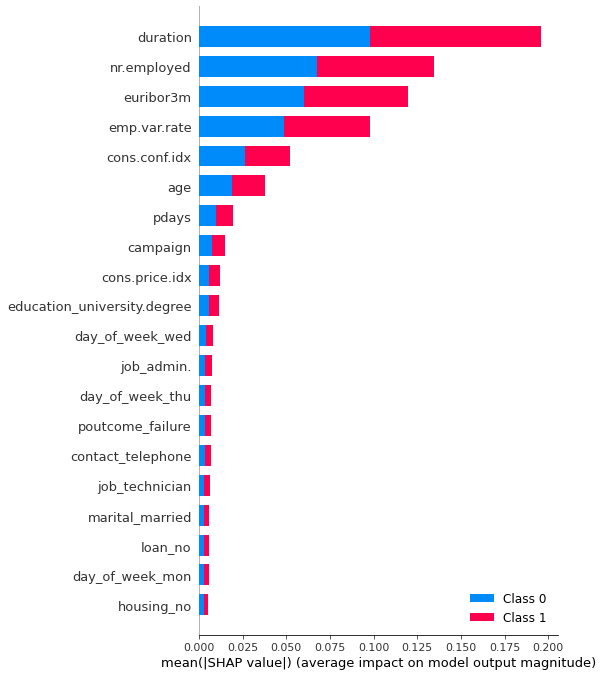

In [154]:
import shap
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(hrDecisionTree) 
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)

**Using shap tree explainer we can see durtion of the call the client stayed is most influencial factor for the output variable. Followed by nr.employeed and euribor3m**

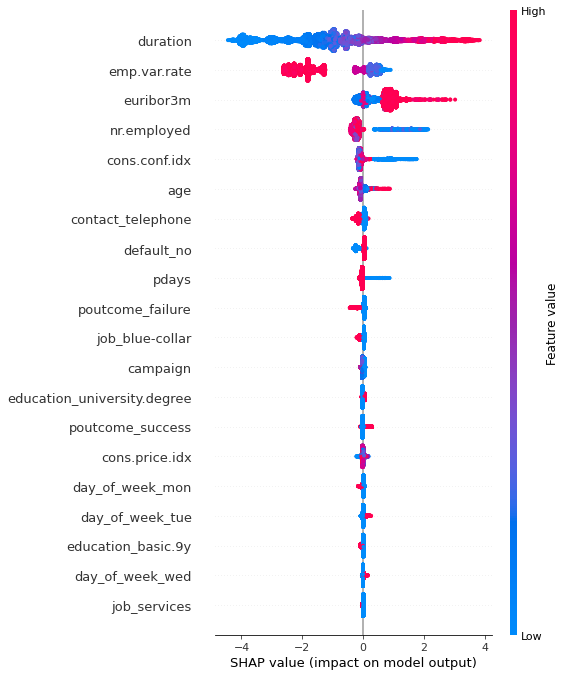

In [155]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(hrXGB)

# Calculate Shap values
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

 **Looking into the tree explainer of XGBoost we can also see how the value of individual columns affect the output. As we can see the higher the duration the higher chance to get Term deposit.
emp.var.rate the higher the rate it is less likely that the client will take the term deposit.**

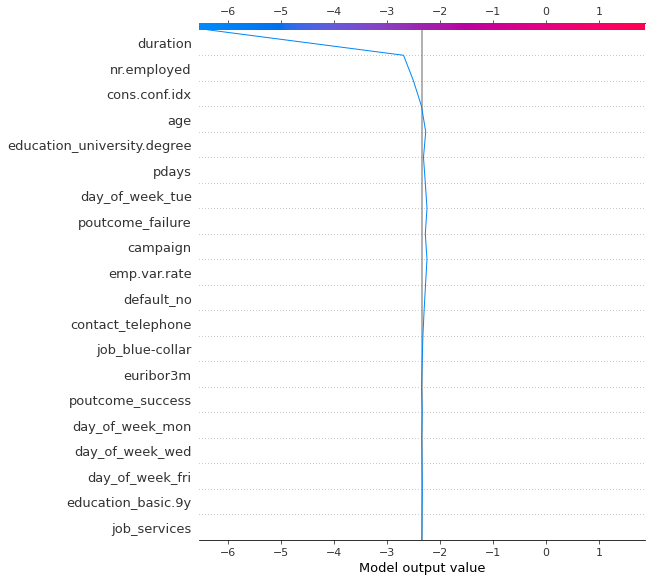

In [156]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_train.iloc[201,:]),
                   feature_names=X_train.columns.tolist()
                   )

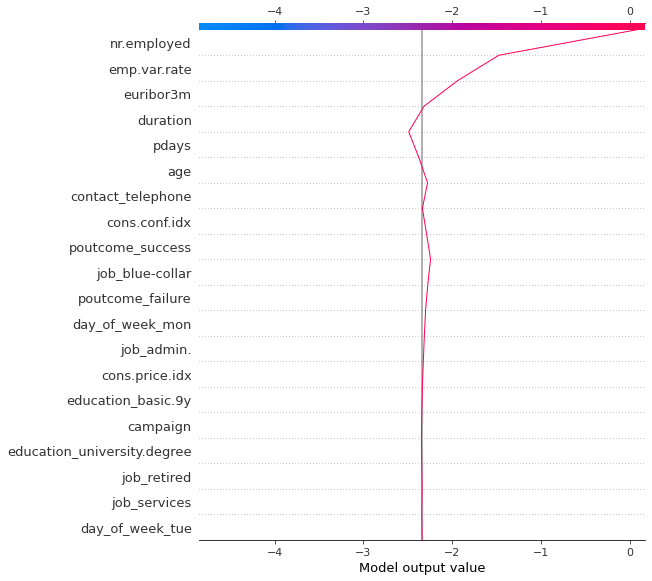

In [157]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_train.iloc[200,:]),
                   feature_names=X_train.columns.tolist()
                   )

**The above two examples shows how individial cases are impacted by different variables. Hence individual result can be explained using this functionality**

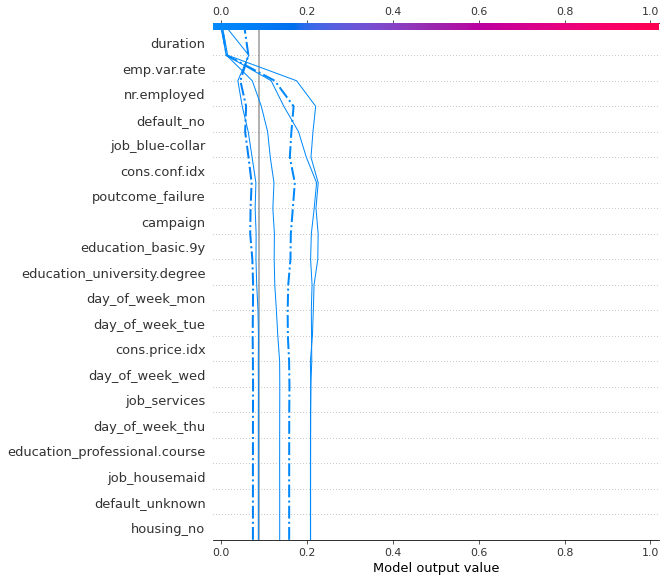

In [158]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_test.iloc[198:204,:]),
                   feature_names=X_train.columns.tolist(),
                    highlight=[2,5],
                    feature_order='hclust',
                   link='logit'
                   )

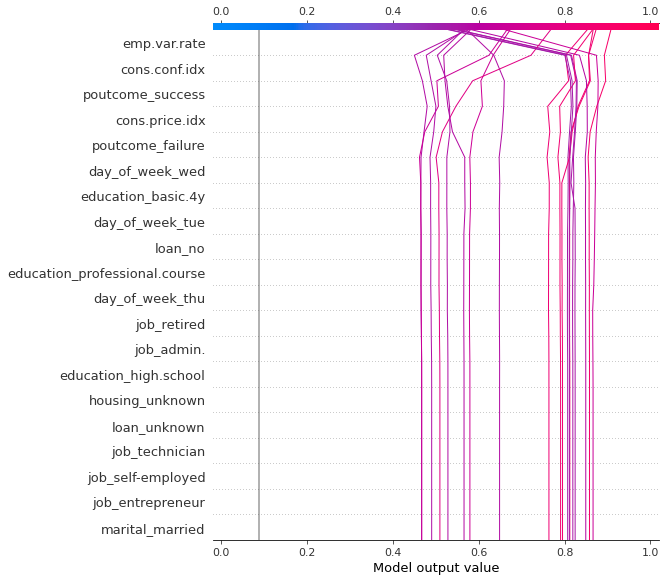

In [159]:

# check for all entrepreneur how the model responds
y_pred = hrXGB.predict(X_test)
T = X_test[(X_test['job_entrepreneur'] == 1 ) & (y_pred == 1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(explainer.expected_value, sh, T, feature_order='hclust', link='logit')

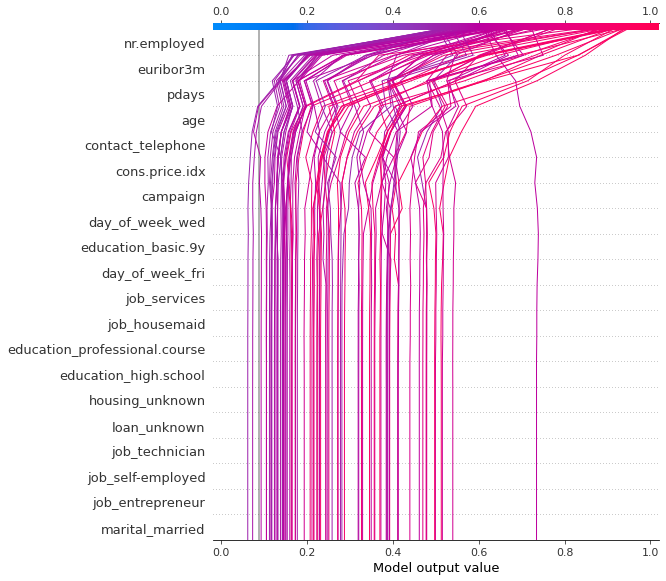

In [160]:
# Check for al retired how the model responds
y_pred = hrXGB.predict(X_test)
T = X_test[(X_test['job_retired'] == 1 ) & (y_pred == 1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(explainer.expected_value, sh, T, feature_order='hclust', link='logit')

#**13. Evaluate Secondary metrics**
Since this is on cloud CPU performance would have been scaled however I have measure time to run the pridection, and it is evident that it was quite fast. However in production environment the results might differ and has to be tested and finetuned accordingly.

In [161]:
# Importing the library
import time 

start_time = time.process_time()
hrXGB.predict(X_test)
end_time = time.process_time()
print(end_time - start_time)


array([0, 1, 0, ..., 0, 0, 0])

0.04512574099999256


#**14. AI model deployment and risk assessment**

In this phase we can plan to access the model from governamce point of view. Few things to cover are, how the the data would be shared. if the personal information data needs to be encypred in the process. how much time to test this against for turnaround time for the output. 

#**15. Operationalise using AI Pipelines**

For Opertionalising the model we need to consider the process of configuration managenent, change Management, Deployment process. how we can get the different teams would work in a DevOps umbrealla to reduce the friction betweent different stages of the project. Also we would be consideting the automation of data feeds, API availability for the model to work in the production environment.


#**16. Hyperautomation process**

In this process we would look for opportunities to automate the end to end process to use automation and AI to its fullest. We would be automating the Datapipeline, alerts on any data issues, providing inputs to the call center employees on who would be the probable cadidates to take the term deposit offer. 

#**17. Monitor and evaluate performance**

As with every model we need to access the performance of the model to check if there is any model degradation or staleness has happend and train the model or fine tune the model accordingly.


#**Use case at work**
I could use this in multiple usecases within my work in HR Analytics, biggest could be Employee voluntary terminations, based on the employee data like salary competiveness, tenure, distance to travel to get to office, number of projects(rotation), years in same grade etc
